1. 使用Kmeans实现2D数据自动聚类，预测`V1=80 V2=60`时的类别

2. 计算accuary, 完成模型矫正

3. 使用KNN, MeanShift完成1~2

In [101]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [102]:
data = pd.read_csv('data.csv')
data.head()


,V1,V2,labels
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0


In [103]:
# 定义x 和 y
x = data.drop(['labels'],axis=1)
y = data.loc[:,'labels']
y.head()


0    0
1    0
2    0
3    0
4    0
Name: labels, dtype: int64

In [104]:
#查看标签的类型个数
pd.value_counts(y)


C:\Users\njbj1210\AppData\Local\Temp\ipykernel_2204\2518791213.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(y)


labels
2    1156
1     954
0     890
Name: count, dtype: int64

<Figure size 640x480 with 0 Axes>

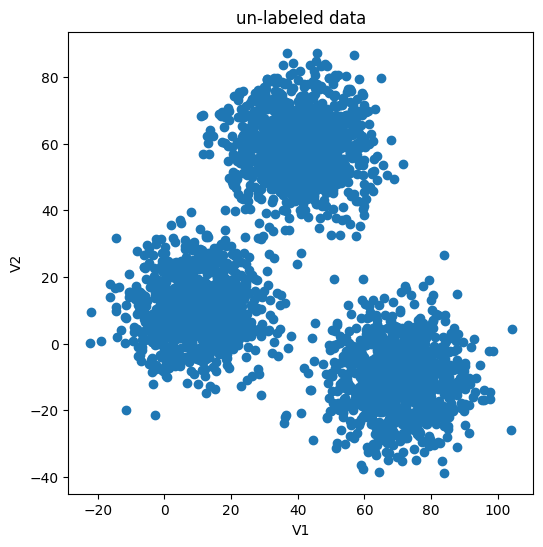

In [105]:
fig1 = plt.figure()
plt.figure(figsize=(6,6))
plt.scatter(x.loc[:,'V1'],x.loc[:,'V2'],)
plt.title('un-labeled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()


<Figure size 640x480 with 0 Axes>

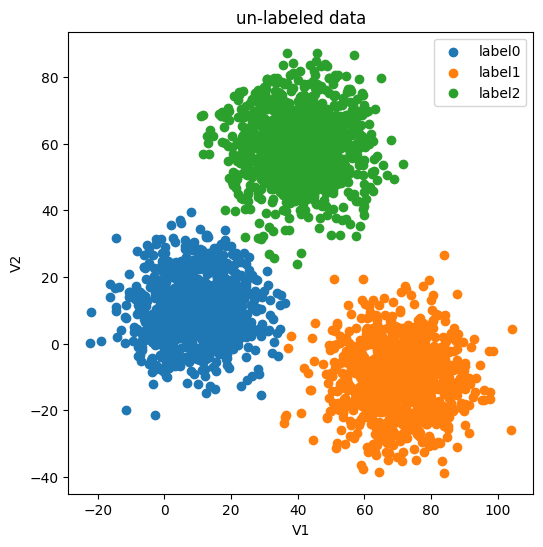

In [106]:
fig2 = plt.figure()
plt.figure(figsize=(6,6))
label0 = plt.scatter(x.loc[:,'V1'][y==0],x.loc[:,'V2'][y==0])
label1 = plt.scatter(x.loc[:,'V1'][y==1],x.loc[:,'V2'][y==1])
label2 = plt.scatter(x.loc[:,'V1'][y==2],x.loc[:,'V2'][y==2])

plt.title('un-labeled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.show()


利用sklearn包构建Kmeans模型

In [107]:
# 设置模型
from sklearn.cluster import KMeans
KM = KMeans(n_clusters=3,random_state=0)
KM.fit(x)


,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [108]:
centers = KM.cluster_centers_
centers


array([[ 40.68362784,  59.71589274],
       [ 69.92418447, -10.11964119],
       [  9.4780459 ,  10.686052  ]])

<Figure size 640x480 with 0 Axes>

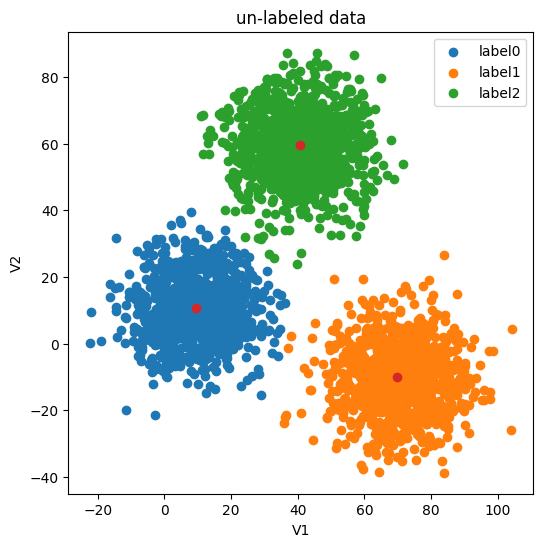

In [109]:
fig3 = plt.figure()
plt.figure(figsize=(6,6))
label0 = plt.scatter(x.loc[:,'V1'][y==0],x.loc[:,'V2'][y==0])
label1 = plt.scatter(x.loc[:,'V1'][y==1],x.loc[:,'V2'][y==1])
label2 = plt.scatter(x.loc[:,'V1'][y==2],x.loc[:,'V2'][y==2])

plt.scatter(centers[:,0],centers[:,1])
plt.title('un-labeled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.show()


In [110]:
# 测试数据 ：V1 = 80 V2 = 60
y_predict_test = KM.predict([[80,60]])
print(y_predict_test)


[0]


d:\Python3.12.6\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [111]:
# 基于训练数据进行预测
y_predict = KM.predict(x)
print(pd.value_counts(y_predict),pd.value_counts(y))


0    1149
1     952
2     899
Name: count, dtype: int64 labels
2    1156
1     954
0     890
Name: count, dtype: int64


C:\Users\njbj1210\AppData\Local\Temp\ipykernel_2204\1742420609.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(y_predict),pd.value_counts(y))


In [112]:
from sklearn.metrics import accuracy_score
accuray = accuracy_score(y,y_predict)
print(accuray)


0.31966666666666665


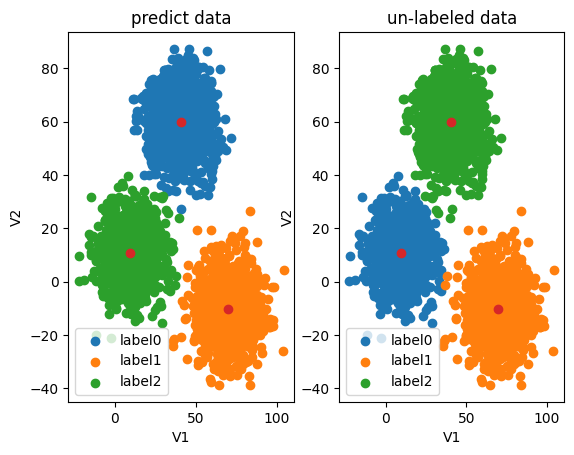

In [113]:
# 可视化训练集
fig4 = plt.subplot(121)

label0 = plt.scatter(x.loc[:,'V1'][y_predict==0],x.loc[:,'V2'][y_predict==0])
label1 = plt.scatter(x.loc[:,'V1'][y_predict==1],x.loc[:,'V2'][y_predict==1])
label2 = plt.scatter(x.loc[:,'V1'][y_predict==2],x.loc[:,'V2'][y_predict==2])

plt.scatter(centers[:,0],centers[:,1])
plt.title('predict data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
fig5 = plt.subplot(122)
label0 = plt.scatter(x.loc[:,'V1'][y==0],x.loc[:,'V2'][y==0])
label1 = plt.scatter(x.loc[:,'V1'][y==1],x.loc[:,'V2'][y==1])
label2 = plt.scatter(x.loc[:,'V1'][y==2],x.loc[:,'V2'][y==2])
plt.scatter(centers[:,0],centers[:,1])
plt.title('un-labeled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.show()


We have to correct the data. 0 -> 2, 1 -> 1, 0 -> 0

In [114]:
#进行数据矫正
y_corrected = []
for i in y_predict:
    if i==0:
        y_corrected.append(2)
    elif i==1:
        y_corrected.append(1)
    else:
        y_corrected.append(0)
print(pd.value_counts(y_corrected),pd.value_counts(y))


2    1149
1     952
0     899
Name: count, dtype: int64 labels
2    1156
1     954
0     890
Name: count, dtype: int64


C:\Users\njbj1210\AppData\Local\Temp\ipykernel_2204\1815146017.py:10: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(y_corrected),pd.value_counts(y))
C:\Users\njbj1210\AppData\Local\Temp\ipykernel_2204\1815146017.py:10: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  print(pd.value_counts(y_corrected),pd.value_counts(y))
C:\Users\njbj1210\AppData\Local\Temp\ipykernel_2204\1815146017.py:10: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(y_corrected),pd.value_counts(y))


In [115]:
accuray1 = accuracy_score(y,y_corrected)
print(accuray1)


0.997


In [116]:
y_corrected = np.array(y_corrected)

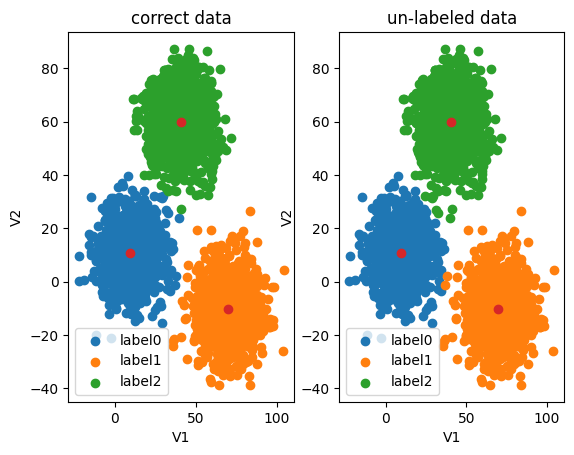

In [117]:
fig6 = plt.subplot(121)

label0 = plt.scatter(x.loc[:,'V1'][y_corrected==0],x.loc[:,'V2'][y_corrected==0])
label1 = plt.scatter(x.loc[:,'V1'][y_corrected==1],x.loc[:,'V2'][y_corrected==1])
label2 = plt.scatter(x.loc[:,'V1'][y_corrected==2],x.loc[:,'V2'][y_corrected==2])

plt.scatter(centers[:,0],centers[:,1])
plt.title('correct data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
fig7 = plt.subplot(122)
label0 = plt.scatter(x.loc[:,'V1'][y==0],x.loc[:,'V2'][y==0])
label1 = plt.scatter(x.loc[:,'V1'][y==1],x.loc[:,'V2'][y==1])
label2 = plt.scatter(x.loc[:,'V1'][y==2],x.loc[:,'V2'][y==2])
plt.scatter(centers[:,0],centers[:,1])
plt.title('un-labeled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.show()


Use sklearn build KNN model

In [118]:
#建立一个KNN模型
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x,y)


,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [119]:
#对测试集进行预测 V1=80 V2=60
y_predict_knn_test = KNN.predict([[80,60]])
y_predict_knn = KNN.predict(x)
print(y_predict_knn_test)
print("knn accuracy:",accuracy_score(y,y_predict_knn))


[2]
knn accuracy: 1.0


d:\Python3.12.6\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [120]:
print(pd.value_counts(y_predict_knn),pd.value_counts(y))

2    1156
1     954
0     890
Name: count, dtype: int64 labels
2    1156
1     954
0     890
Name: count, dtype: int64


C:\Users\njbj1210\AppData\Local\Temp\ipykernel_2204\1086552108.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(y_predict_knn),pd.value_counts(y))


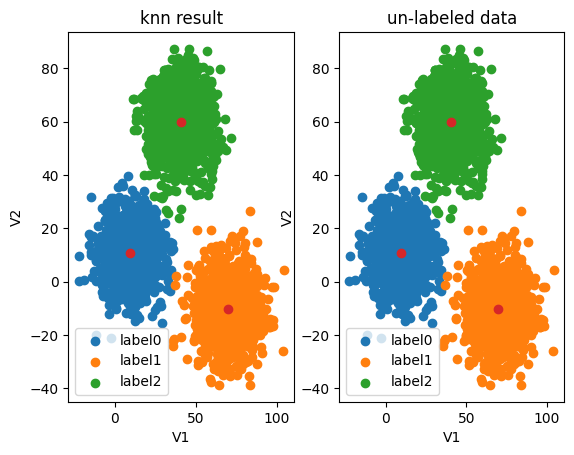

In [121]:
fig6 = plt.subplot(121)

label0 = plt.scatter(x.loc[:,'V1'][y_predict_knn==0],x.loc[:,'V2'][y_predict_knn==0])
label1 = plt.scatter(x.loc[:,'V1'][y_predict_knn==1],x.loc[:,'V2'][y_predict_knn==1])
label2 = plt.scatter(x.loc[:,'V1'][y_predict_knn==2],x.loc[:,'V2'][y_predict_knn==2])

plt.scatter(centers[:,0],centers[:,1])
plt.title('knn result')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
fig7 = plt.subplot(122)
label0 = plt.scatter(x.loc[:,'V1'][y==0],x.loc[:,'V2'][y==0])
label1 = plt.scatter(x.loc[:,'V1'][y==1],x.loc[:,'V2'][y==1])
label2 = plt.scatter(x.loc[:,'V1'][y==2],x.loc[:,'V2'][y==2])
plt.scatter(centers[:,0],centers[:,1])
plt.title('un-labeled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.show()


Using sklearn to build MeanShift model

In [122]:
#建立meanshift模型
from sklearn.cluster import MeanShift,estimate_bandwidth
#估计带宽
bw = estimate_bandwidth(x,n_samples=500)
print(bw)


30.84663454820215


In [123]:
ms = MeanShift(bandwidth=bw)
ms.fit(x)


,bandwidth,np.float64(30.84663454820215)
,seeds,None
,bin_seeding,False
,min_bin_freq,1
,cluster_all,True
,n_jobs,None
,max_iter,300


In [124]:
y_predict_ms = ms.predict(x)
print(pd.value_counts(y_predict_ms),pd.value_counts(y))


0    1149
1     952
2     899
Name: count, dtype: int64 labels
2    1156
1     954
0     890
Name: count, dtype: int64


C:\Users\njbj1210\AppData\Local\Temp\ipykernel_2204\1125713436.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(y_predict_ms),pd.value_counts(y))


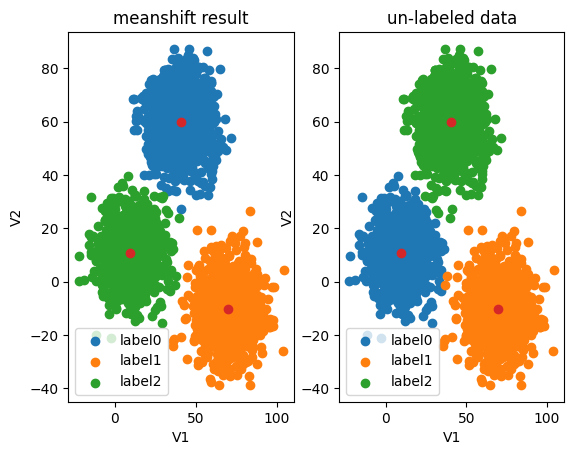

In [125]:
fig6 = plt.subplot(121)

label0 = plt.scatter(x.loc[:,'V1'][y_predict_ms==0],x.loc[:,'V2'][y_predict_ms==0])
label1 = plt.scatter(x.loc[:,'V1'][y_predict_ms==1],x.loc[:,'V2'][y_predict_ms==1])
label2 = plt.scatter(x.loc[:,'V1'][y_predict_ms==2],x.loc[:,'V2'][y_predict_ms==2])

plt.scatter(centers[:,0],centers[:,1])
plt.title('meanshift result')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
fig7 = plt.subplot(122)
label0 = plt.scatter(x.loc[:,'V1'][y==0],x.loc[:,'V2'][y==0])
label1 = plt.scatter(x.loc[:,'V1'][y==1],x.loc[:,'V2'][y==1])
label2 = plt.scatter(x.loc[:,'V1'][y==2],x.loc[:,'V2'][y==2])
plt.scatter(centers[:,0],centers[:,1])
plt.title('un-labeled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.show()


In [126]:
#进行数据矫正
y_corrected_ms = []
for i in y_predict_ms:
    if i==0:
        y_corrected_ms.append(2)
    elif i==1:
        y_corrected_ms.append(1)
    else:
        y_corrected_ms.append(0)
print(pd.value_counts(y_corrected),pd.value_counts(y))


2    1149
1     952
0     899
Name: count, dtype: int64 labels
2    1156
1     954
0     890
Name: count, dtype: int64


C:\Users\njbj1210\AppData\Local\Temp\ipykernel_2204\3520948511.py:10: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(y_corrected),pd.value_counts(y))


In [127]:
#更改数据格式
y_corrected_ms = np.array(y_corrected_ms)
print(type(y_corrected_ms))


<class 'numpy.ndarray'>


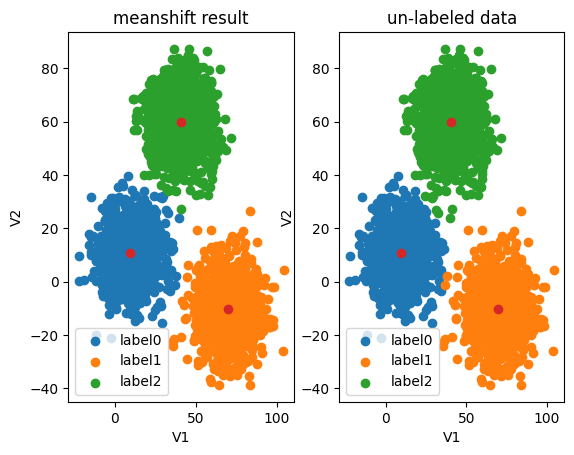

In [128]:
fig6 = plt.subplot(121)

label0 = plt.scatter(x.loc[:,'V1'][y_corrected_ms==0],x.loc[:,'V2'][y_corrected_ms==0])
label1 = plt.scatter(x.loc[:,'V1'][y_corrected_ms==1],x.loc[:,'V2'][y_corrected_ms==1])
label2 = plt.scatter(x.loc[:,'V1'][y_corrected_ms==2],x.loc[:,'V2'][y_corrected_ms==2])

plt.scatter(centers[:,0],centers[:,1])
plt.title('meanshift result')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
fig7 = plt.subplot(122)
label0 = plt.scatter(x.loc[:,'V1'][y==0],x.loc[:,'V2'][y==0])
label1 = plt.scatter(x.loc[:,'V1'][y==1],x.loc[:,'V2'][y==1])
label2 = plt.scatter(x.loc[:,'V1'][y==2],x.loc[:,'V2'][y==2])
plt.scatter(centers[:,0],centers[:,1])
plt.title('un-labeled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.show()


DBSCAN Clustering with sklearn

In [129]:
# Import DBSCAN from sklearn
from sklearn.cluster import DBSCAN

# Fit DBSCAN model
dbscan = DBSCAN(eps=8, min_samples=5)
dbscan.fit(x)

labels = dbscan.labels_

# Get predicted labels
y_pred_dbscan = dbscan.labels_
print("DBSCAN labels count:", pd.value_counts(y_pred_dbscan))

DBSCAN labels count:  0    2994
-1       6
Name: count, dtype: int64


C:\Users\njbj1210\AppData\Local\Temp\ipykernel_2204\1360102769.py:12: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print("DBSCAN labels count:", pd.value_counts(y_pred_dbscan))


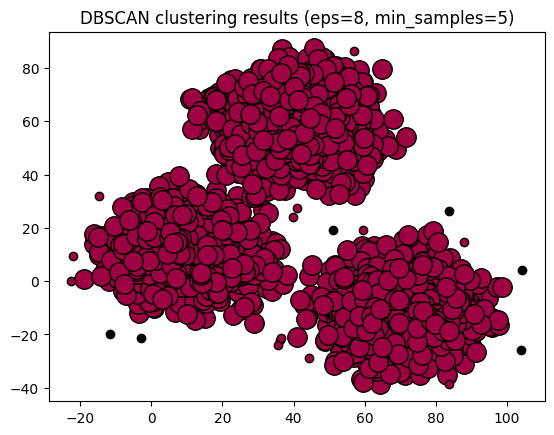

In [130]:
# Visualize DBSCAN results
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = x[class_member_mask & core_samples_mask]
    plt.plot(
        xy['V1'],
        xy['V2'],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = x[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy['V1'],
        xy['V2'],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"DBSCAN clustering results (eps={dbscan.eps}, min_samples={dbscan.min_samples})")
plt.show()

In [131]:
# Compare DBSCAN labels with true labels (ignoring noise)
from sklearn.metrics import adjusted_rand_score

# Only compare for non-noise points
mask = y_pred_dbscan != -1
if np.any(mask):
    ari = adjusted_rand_score(y[mask], y_pred_dbscan[mask])
    print("Adjusted Rand Index (excluding noise):", ari)
else:
    print("No clusters found by DBSCAN.")

Adjusted Rand Index (excluding noise): 0.0
